# Chapter 4: Training Models

Learning algorithms will often optimize a different loss function
during training than the performance measure used to evaluate
the final model. This is generally because the function is easier to
optimize and/or because it has extra terms needed during training
only (e.g., for regularization). A good performance metric is as
close as possible to the final business objective. A good training
loss is easy to optimize and strongly correlated with the metric. For
example, classifiers are often trained using a cost function such as
the log loss (as you will see later in this chapter) but evaluated using
precision/recall. The log loss is easy to minimize, and doing so will
usually improve precision/recall.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right)^2$$

## Optimizing parameters

### **1. Normal Equation**

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [13]:
#Generating some linear-looking data
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m ,1) #rand is for noise (to be of the line)

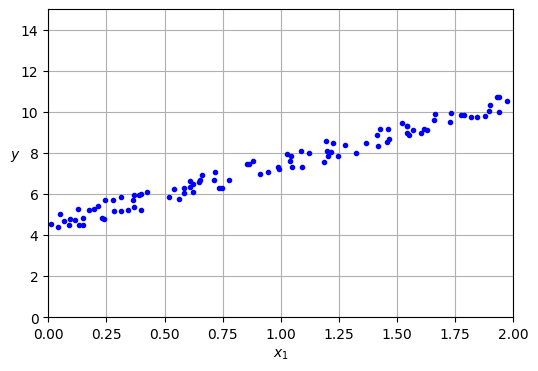

In [6]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [14]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [15]:
theta_best

array([[4.51359766],
       [2.98323418]])

Originally they were 4 and 3, so it is pretty close

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict


array([[ 4.51359766],
       [10.48006601]])

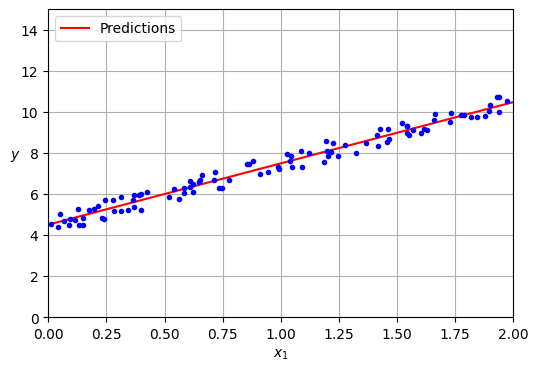

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

> By the way `scikit-learn Linear Regression` actually uses ***singular value decomposition (SVD)***, cause there is less issues with  inverting the matrix

> Both the Normal equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000).

### 2. Iterative Methods

####  **Batch Gradient Descent**

Индивидуальный подход

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right)^2$$

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{2}{m} \sum_{i=1}^{m} \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right) \cdot \mathbf{x}^{(i)}$$

Матричный

$$J(\boldsymbol{\theta}) = \frac{1}{m} \left( \mathbf{X}\boldsymbol{\theta} - \mathbf{y} \right)^2$$

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{2}{m} \mathbf{X}^\top \left( \mathbf{X} \theta - \mathbf{y} \right)$$

Шаг обновления

$$\theta := \theta - \eta \cdot \nabla_\theta J(\theta)$$

In [30]:
#Implementation
eta = 0.1
n_epochs = 500
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    deriv = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * deriv
print(theta)


[[4.51359763]
 [2.9832342 ]]


#### **Stohastic Gradient Descent**

1. Функция стоимости для одного примера:


$$
J^{(i)}(\theta) = \frac{1}{m} \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right)^2
$$

2. Градиент функции стоимости для одного примера:

Градиент функции стоимости относительно параметров \( \theta \) для одного примера \(i\):

$$
\frac{\partial J^{(i)}(\theta)}{\partial \theta} = \mathbf{2} \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right) \mathbf{x}^{(i)}
$$

3. Правило обновления параметров:

Правило обновления параметров в стохастическом градиентном спуске:

$$
\theta := \theta - \eta \cdot \frac{\partial J^{(i)}(\theta)}{\partial \theta}
$$

После подстановки градиента:

$$
\theta := \theta - \eta \cdot \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right) \mathbf{x}^{(i)}
$$

4. Процесс итерации:

Для каждого примера \(i\) в обучающем наборе данных повторяем:

$$
\text{Повторяем для каждого } i \text{ от } 1 \text{ до } m:
$$

$$
\theta := \theta - \eta \cdot \left( \theta^\top \mathbf{x}^{(i)} - y^{(i)} \right) \mathbf{x}^{(i)}
$$

In [43]:
# Implementation

n_epochs = 50
eta = 0.1
m = len(X_b)
t0, t1 = 5, 50

def learning_scheduele(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        deriv = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_scheduele(epoch * m + iteration)
        theta -= eta * deriv
print(theta)


[[4.51548062]
 [2.9775157 ]]


> To perform linear regression using SGD with scikit learn you can use SGDRegressor 

In [45]:
from sklearn.linear_model import SGDRegressor

#iterates until the loss drops by less that (tol) during
# 100 epochs (n_iter_no_change)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty = None, n_iter_no_change=100,
                        eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())       

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

#### **Mini-batch gradient descent**

<table>
    <thead>
        <tr>
            <td><b>Algorithm</b> </td>
            <td><b>Large m (training examples)</b></td>
            <td><b>Large n (feauters)</b></td>
            <td><b>Scikit-Learn</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Normal Equation</td>
            <td>Fast</td>
            <td>Slow</td>
            <td>LinearRegression</td>
        </tr>
        <tr>
            <td>SVD</td>
            <td>Fast</td>
            <td>Slow</td>
            <td>LinearRegression</td>
        </tr>
        <tr>
            <td>Batch GD</td>
            <td>Slow</td>
            <td>Fast</td>
            <td>N/A</td>
        </tr>
        <tr>
            <td>SGD</td>
            <td>Fast</td>
            <td>Fast</td>
            <td>SGDRegressor</td>
        </tr>
        <tr>
            <td>Mini-batch GD</td>
            <td>Fast</td>
            <td>Fast</td>
            <td>N/A</td>
        </tr>
    </tbody>
</table>

## Polynomial Regression

In [28]:
import numpy as np

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.rand(m, 1)

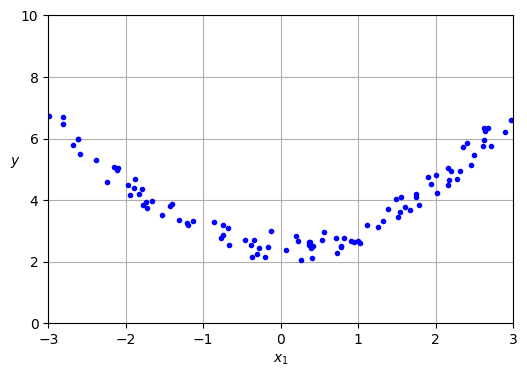

In [10]:
import matplotlib.pyplot as plt

# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-2.17117388]
[-2.17117388  4.713996  ]


In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.5103045]), array([[-0.00498522,  0.49908915]]))

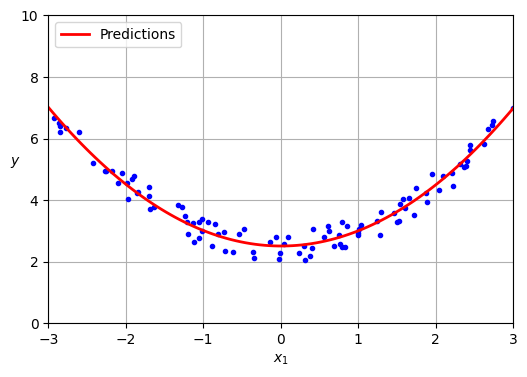

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

## Learning Curves

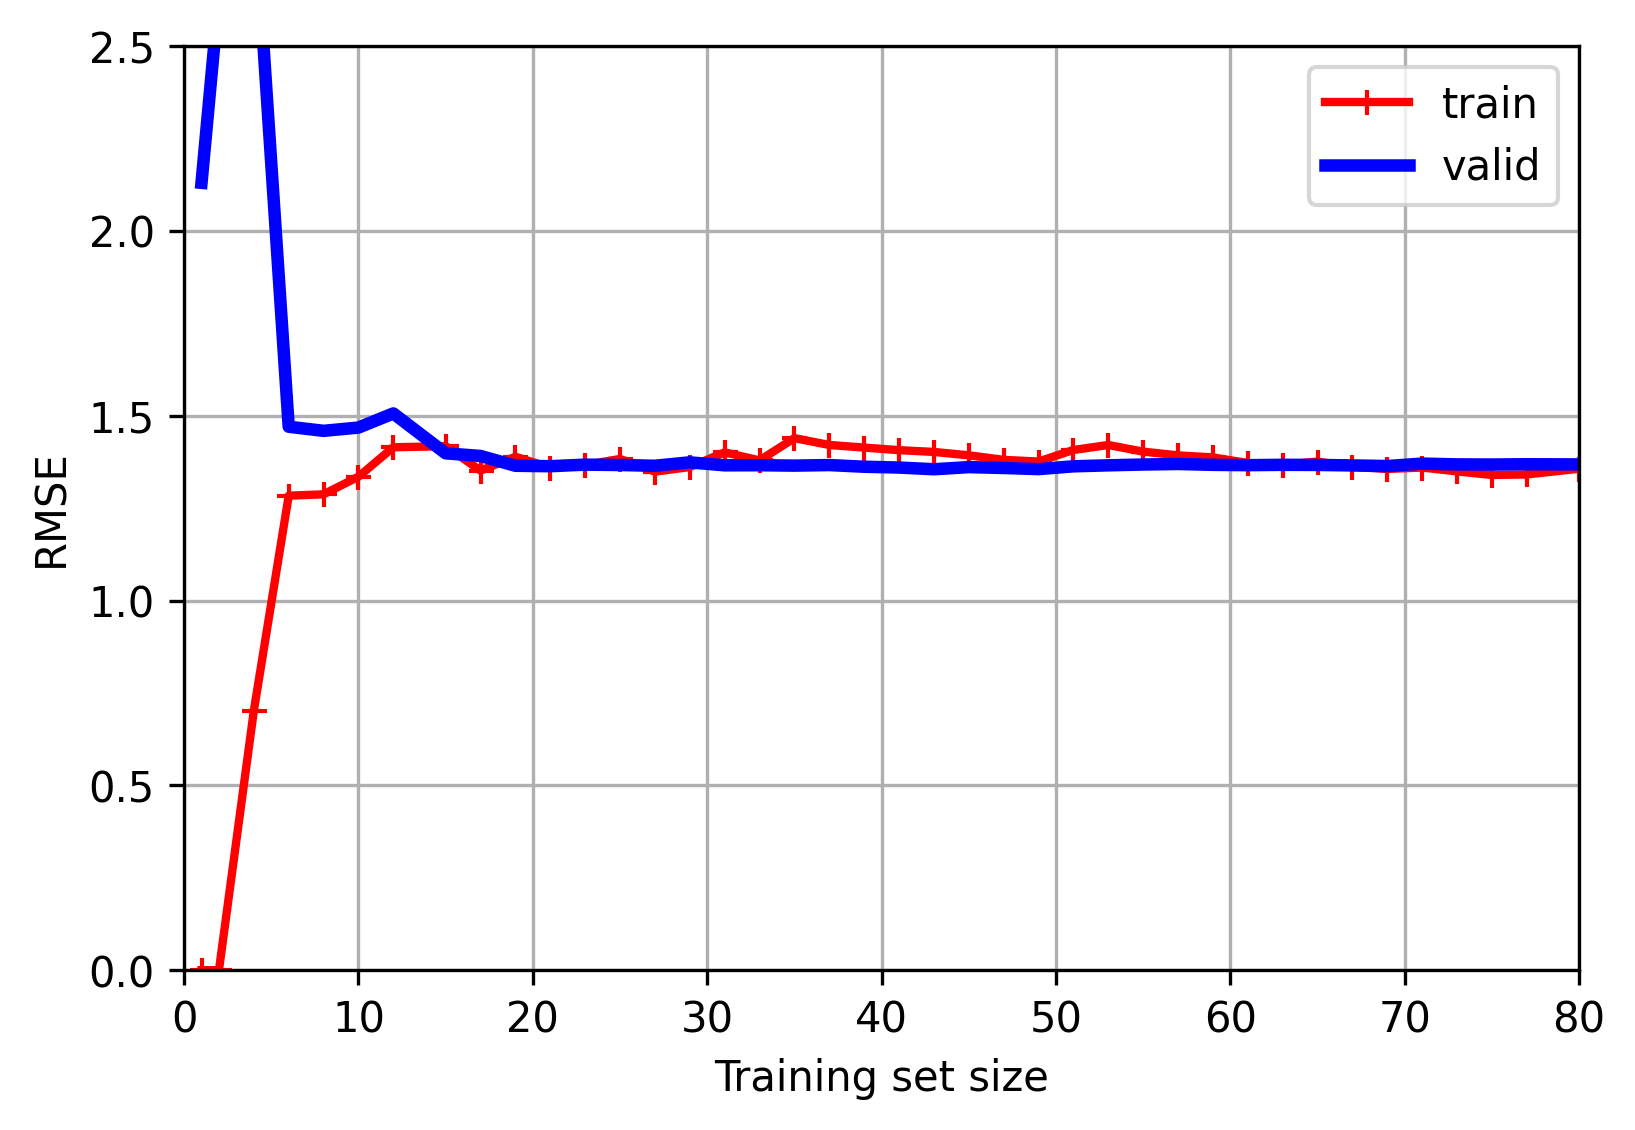

In [30]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(6, 4), dpi=300)

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = - train_scores.mean(axis=1)
valid_errors = - valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 2.5])
plt.show()

> The plot shows that the model underfits the data - perhaps we should increase ther number of polynomial degrees

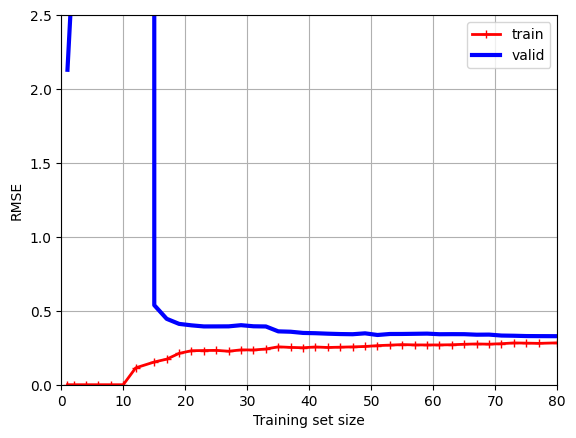

In [34]:
from sklearn.pipeline import make_pipeline

poly_10 = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    poly_10, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = - train_scores.mean(axis=1)
valid_errors = - valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 2.5])
plt.show()

Now it is much better

## Regularized Linear Models

### Ridge

$$J(\theta) = \frac{1}{2m} \left( \| \mathbf{X} \theta - \mathbf{y} \|_2^2 + \lambda \| \theta \|_2^2 \right)$$

$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \right)$$

> Справка - ниже обычная l2 норма, а сверху l2 норма в квадрате

$$\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

In [37]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

First option

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

Second Option

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

### Lasso

$$J(\theta) = \frac{1}{2m} \left( \| \mathbf{X} \theta - \mathbf{y} \|_2^2 + \lambda \| \theta \|_1 \right)$$

$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j| \right)$$

> An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). 

> In other words, lasso regression automatically performs feature selection and outputs a sparse model with few nonzero feature weights.

In [41]:
from sklearn.linear_model import Lasso 

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net Regression


Elastic net regression is a middle ground between ridge regression and lasso regression.
The regularization term is a weighted sum of both ridge and lasso’s regularization
terms, and you can control the mix ratio r. When r = 0, elastic net is equivalent
to ridge regression, and when r = 1, it is equivalent to lasso regression

$$J(\theta) = \text{MSE}(\theta) + r \cdot \frac{\alpha}{2} \sum_{i=1}^{n} \theta_i^2 + (1 - r) \cdot \alpha \sum_{i=1}^{n} |\theta_i|
$$

In [44]:
from sklearn.linear_model import ElasticNet 

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]])

array([1.54333232])

### Early Stopping

In [1]:
from copy import deepcopy
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

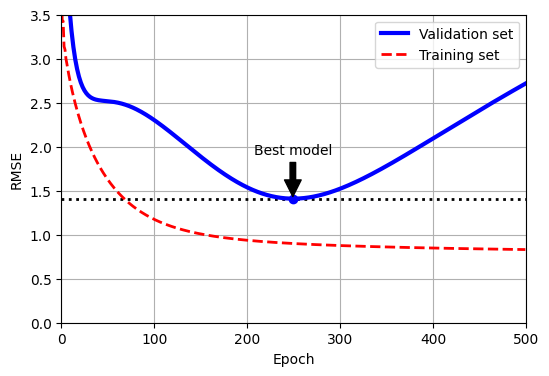

: 

In [2]:
# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = np.sqrt(mean_squared_error(y_valid, y_valid_predict))
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()